# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

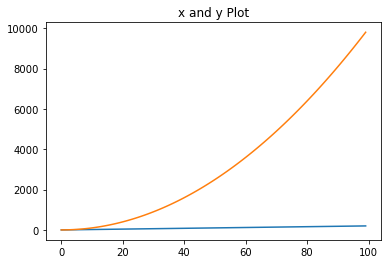

In [3]:
'''
one way is to have both lines in the same plot, but in this case the axis
are very different - we should show them in two seperate plots.
'''

fig, ax = plt.subplots()
ax.set_title("x and y Plot")

ax.plot(x, y)
ax.plot(x, z)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

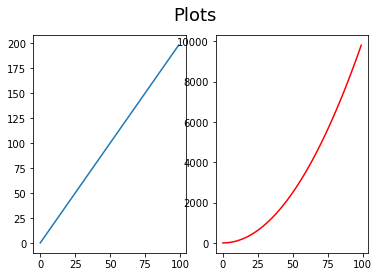

In [4]:
fig2, ax2 = plt.subplots(1, 2)
fig2.suptitle('Plots', fontsize=18)

ax2[0].plot(x, y)
ax2[1].plot(x, z, color='red')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

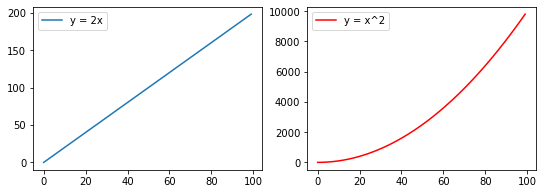

In [5]:
fig2, ax2 = plt.subplots(1, 2, figsize = (9, 3))
ax2[0].plot(x, y, label = 'y = 2x')
ax2[1].plot(x, z, color='red', label = 'y = x^2')

ax2[0].legend(loc = 'upper left')
ax2[1].legend(loc = 'upper left')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

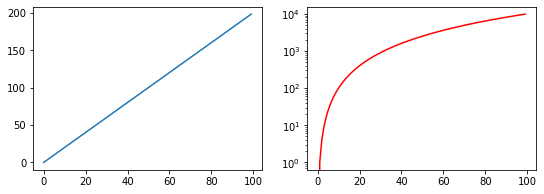

In [6]:
fig4, ax4 = plt.subplots(1, 2, figsize = (9,3))
ax4[0].plot(x, y, label = 'y = 2x')
ax4[1].plot(x, z, color='red', label = 'y = x^2')
ax4[1].set_yscale('log')

#### As a bonus challenge, try to add a legend to the plot.

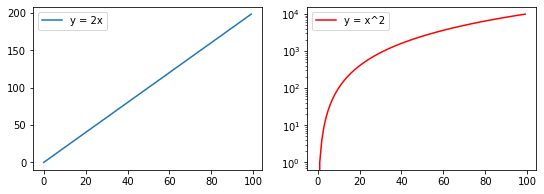

In [7]:
fig4, ax4 = plt.subplots(1, 2, figsize = (9,3))
ax4[0].plot(x, y, label = 'y = 2x')
ax4[1].plot(x, z, color='red', label = 'y = x^2')
ax4[1].set_yscale('log')

ax4[0].legend(loc = 'upper left')
ax4[1].legend(loc = 'upper left')

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.0,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.4,92.086331,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
month = fitbit.groupby(['Months_encoded'])['Steps'].median().reset_index()
month

# MEDIAN STEPS BY WORK_OR_WEEKEND
week = fitbit.groupby(['Work_or_Weekend'])['Steps'].median().reset_index()
week

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


In [10]:
month

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


([<matplotlib.axis.XTick at 0x1d2388b2370>,
 [Text(0, 0, 'Workday'), Text(1, 0, 'Weekend')])

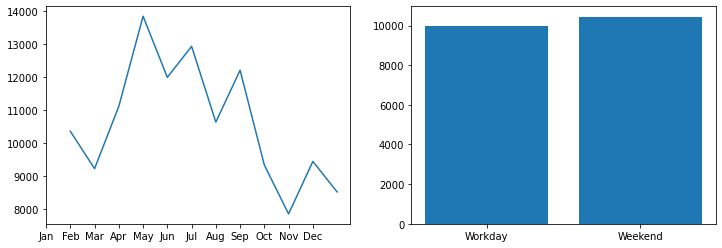

In [11]:
fig1, plt1 = plt.subplots(1,2, figsize=(12,4))
plt.sca(plt1[0])
plt1[0].plot(month['Months_encoded'], month['Steps'])
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.sca(plt1[1])
plt1[1].bar(week['Work_or_Weekend'], week['Steps'])
plt.xticks(range(2), ['Workday', 'Weekend'])

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

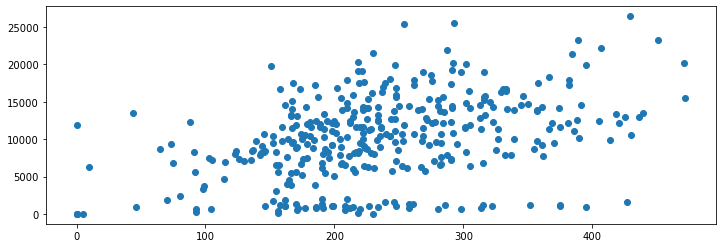

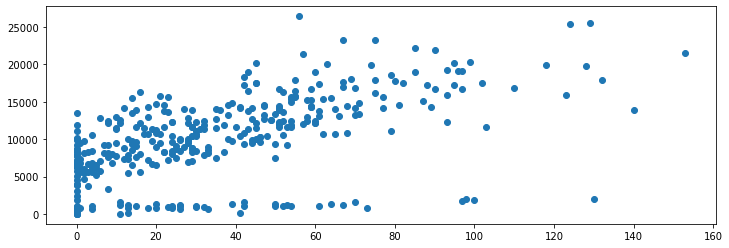

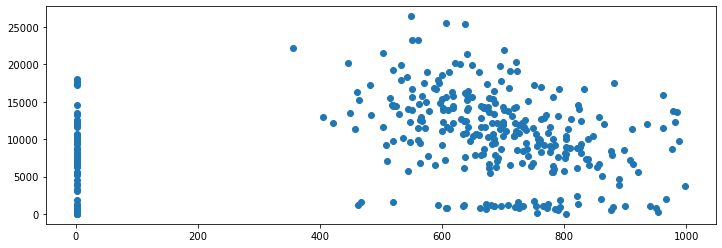

In [12]:
activity = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for minutes in activity:
    plt.figure(figsize=(12, 4))
    plt.scatter(fitbit[minutes], fitbit['Steps'])
    
plt.savefig('../figures/figure1.png', dpi=700)

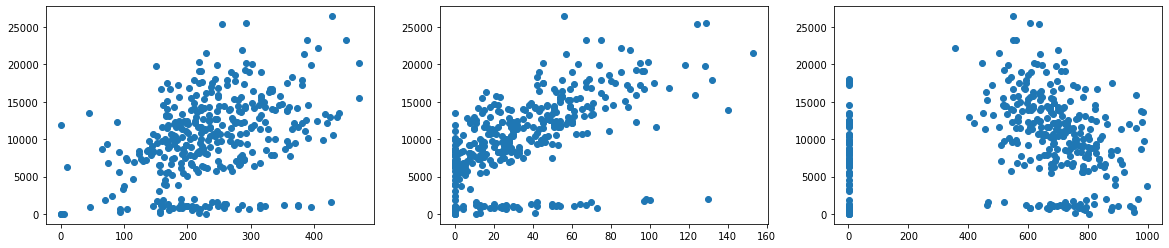

In [13]:
activity = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
fig_5, plt_5 = plt.subplots(1, 3, figsize=(20,4))

for index, minutes in enumerate(activity):
    plt_5[index].scatter(fitbit[minutes], fitbit['Steps'])
    
plt.savefig('../figures/figure2.png', dpi=700)

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [37]:
titanic = sns.load_dataset('titanic')

In [38]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Explore the titanic dataset using Pandas dtypes.

In [16]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [17]:
# NUMERICAL VARIABLES
num = titanic.select_dtypes(include=['int64', 'float64'])

In [18]:
# CATEGORICAL VARIABLES
cat = titanic.select_dtypes(exclude=['int64', 'float64'])

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [19]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,4)})
sns.set_palette('GnBu_r')

#### Use the right visulalization to show the distribution of column `Age`.

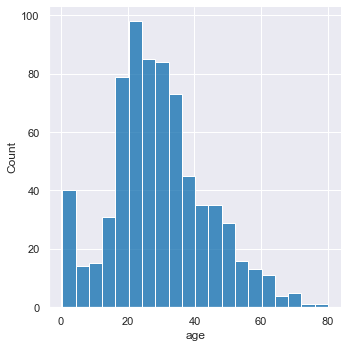

In [20]:
sns.displot(titanic, x="age")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

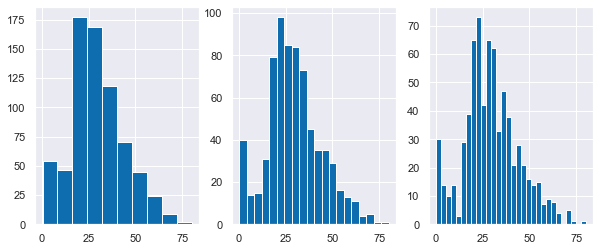

In [21]:
fig, ax = plt.subplots(1, 3)
ax[0].hist(titanic['age'], bins=10)
ax[1].hist(titanic['age'], bins=20)
ax[2].hist(titanic['age'], bins=30)

#### How does the bin size affect your plot?

In [22]:
"""
Larger bin sizes show that there are outliers near 0. This might be because unknown ages are supplemented with a 0.
The larger the bin size the more detail you get but it also gets more confusing. Here a bin size of 20 seems like a good choice.
"""

'\nLarger bin sizes show that there are outliers near 0. This might be because unknown ages are supplemented with a 0.\nThe larger the bin size the more detail you get but it also gets more confusing. Here a bin size of 20 seems like a good choice.\n'

#### Use seaborn to show the distribution of column `Age`.

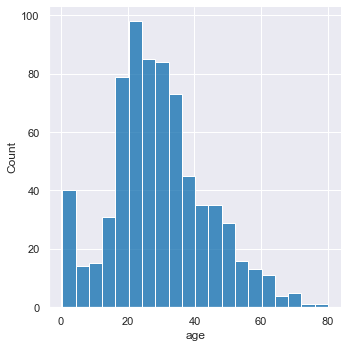

In [23]:
sns.displot(titanic, x="age")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

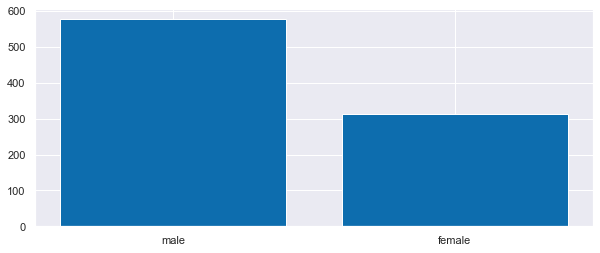

In [24]:
# Method 1 - matplotlib
who = titanic['sex'].value_counts()
plt.bar(who.index, who)

<AxesSubplot:xlabel='sex', ylabel='count'>

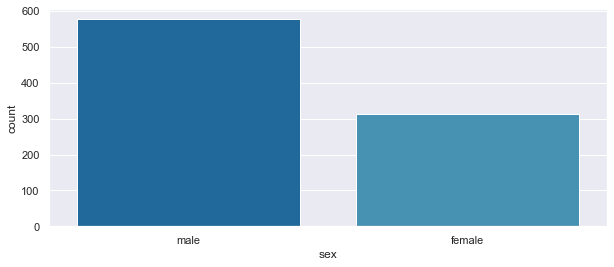

In [25]:
# Method 2 - seaborn
sns.countplot(x = 'sex', data = titanic)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='class', ylabel='count'>

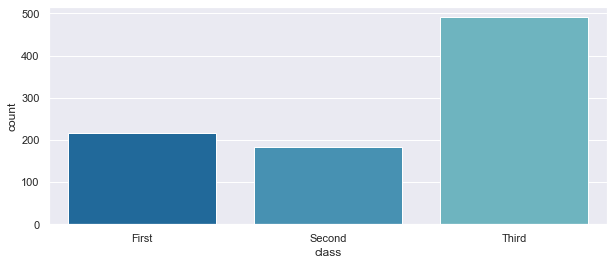

In [26]:
sns.countplot(x = 'class', data = titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

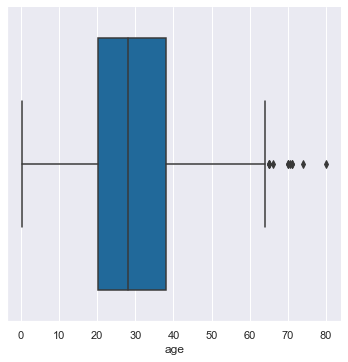

In [27]:
sns.catplot(x='age', kind="box", data = titanic)

#### What does the last plot tell you about the feature `Age`?

In [28]:
"""
The minimum age is 0, the maximum age is 80. The ages above 65 are outliers.
Median is around 27 with the majority of people being between 20 and 39.
"""

'\nThe minimum age is 0, the maximum age is 80. The ages above 65 are outliers.\nMedian is around 27 with the majority of people being between 20 and 39.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='age'>

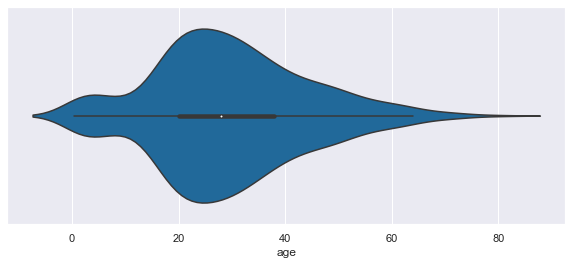

In [29]:
# your code here

sns.violinplot(x=titanic.age)

#### What additional information does the last plot provide about feature `Age`?

In [30]:
"""
we can see the distribution of age more visually. Can see where the ages
are more clustered (around 25 years).
"""

'\nwe can see the distribution of age more visually. Can see where the ages\nare more clustered (around 25 years).\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

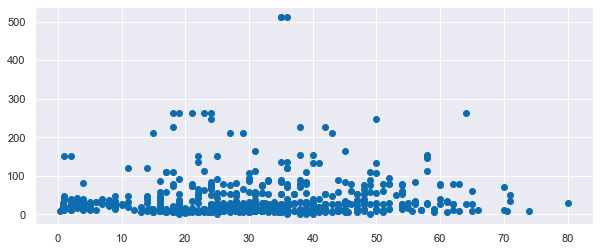

In [31]:
# Method 1 - matplotlib

plt.scatter(titanic['age'], titanic['fare'])

<AxesSubplot:xlabel='age', ylabel='fare'>

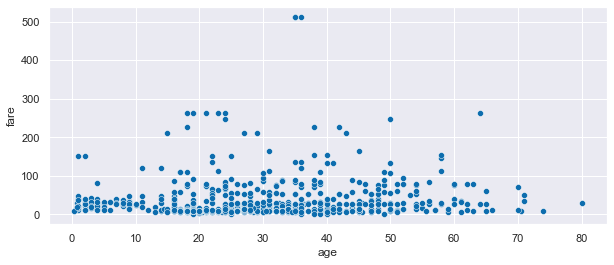

In [32]:
# Method 2 - seaborn
sns.scatterplot(x = 'age', y = 'fare', data = titanic)


#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

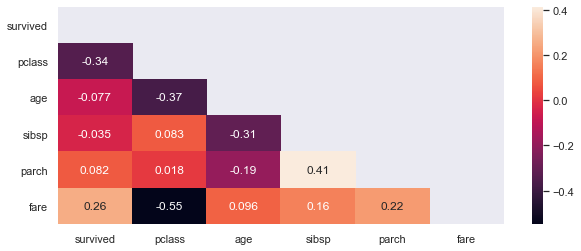

In [33]:
corr = num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)

#### What are the most correlated features?

In [34]:
"""
Pclass and fare are the most (negatively) correlated.
"""

'\nPclass and fare are the most (negatively) correlated.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

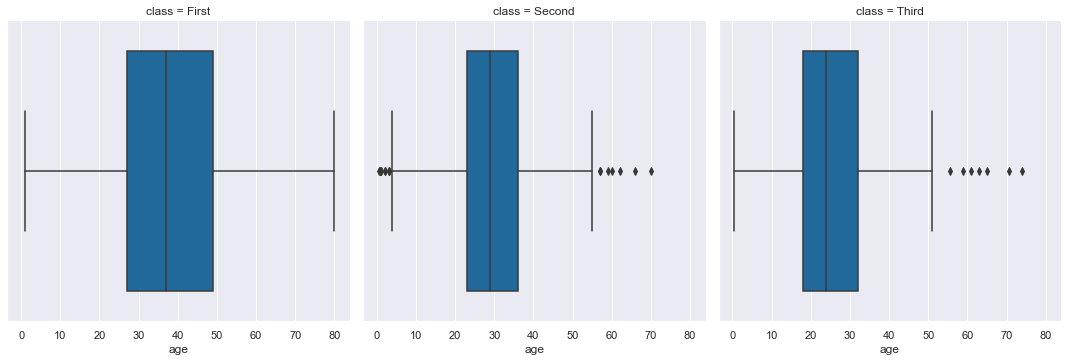

In [35]:
sns.catplot(x='age', data = titanic, col='class', kind="box")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

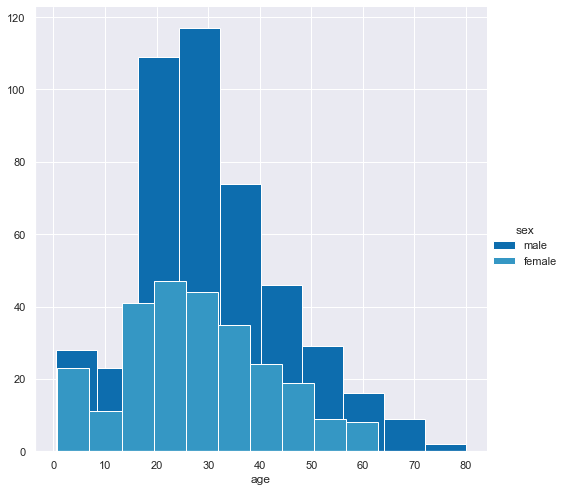

In [36]:
sns.FacetGrid(data = titanic, hue = 'sex', height = 7).map(plt.hist, 'age').add_legend()